# Motivate Bikeshare Exploratory Data Analysis
by Baily Jepsen

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#datasets">Read and Display Datasets</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#references">References</a></li>   
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
>The data used for this analysis was provided by Motivate, an "operations and logistics organization in the micromobility industry" based in the United States (Motivate, n.d.). The purpose of this project is to explore how Motivate's bike-sharing systems are used by uncovering usage patterns. I will be comparing system usage data between three large cities: Chicago, New York City, and Washington, D.C. 

>Some data wrangling has already been performed by Udacity on the datasets prior to this investigation. The original files were cleaned, condensed, and standardized. The data was randomly selected from the first six months of 2017 and each dataset contains the following six columns:
> <ul>
 <li>Start Time (e.g., 2017-01-01 00:07:57)</li>
 <li>End Time (e.g., 2017-01-01 00:20:53)</li>
 <li>Trip Duration (in seconds - e.g., 776)</li>
 <li>Start Station (e.g., Broadway & Barry Ave)</li>
 <li>End Station (e.g., Sedgwick St & North Ave)</li>
 <li>User Type (Subscriber or Customer)</li>
 </ul>
>The Chicago and New York City datasets also have the following two columns:
> <ul>
 <li>Gender (Female or Male)</li>
 <li>Birth Year (e.g. 1965)</li>
 </ul>
 
>I do not plan on utilizing either of these two extra columns in my exploration of the data. Unless data is being explored for medical purposes, including gender in an analysis can do more harm than good. In this modern era more and more individuals are choosing to not identify as either gender. And most surveys/questionnaires do not allow those individuals a chance to identify themselves, so more often than not their gender is recorded in a dataset as N/A. 

### Questions for Analysis

> **<a href="#q1">Question 1</a>**
> What is the most popular day of the week to bike in each city?

> **<a href="#q2">Question 2</a>**
> What is the average trip duration for each city?

> **<a href="#q3">Question 3</a>**
> How many subscribers and customers does each city have?

<a id='datasets'></a>
## Read and Display Datasets

In [1]:
# Import libraries
library(ggplot2)
library(lubridate)

# Read in data files
chi = read.csv('chicago.csv')
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


<a id='wrangling'></a>
## Data Wrangling

The goal for wrangling the datasets is to make analysis of the data easier. This will be accomplished by combining the three datasets into one dataset. The `master` dataset will be used in two of my three analyses. 

In [5]:
# Remove the Gender and Birth.Year columns from the Chicago and New York City 
# datasets (NNK, 2022)
chi <- chi[,!names(chi) %in% c('Gender', 'Birth.Year')]
ny <- ny[,!names(ny) %in% c('Gender', 'Birth.Year')]

In [6]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber


In [7]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber


In [8]:
# Add a new column to each dataset indicating city
chi$City <- 'Chicago'
ny$City <- 'New York City'
wash$City <- 'Washington D.C.'

In [9]:
# Convert the Start.Time column to a data type that allows extraction of 
# date/time information for each city (Wickham, n.d.)
chi$Start.Time <- ymd_hms(chi$Start.Time)
ny$Start.Time <- ymd_hms(ny$Start.Time)
wash$Start.Time <- ymd_hms(wash$Start.Time)

In [10]:
# Add a new column indicating the numeric day of the week for each city 
# (Zach, 2021)
chi$Num.Day.Of.Week <- wday(chi$Start.Time)
ny$Num.Day.Of.Week <- wday(ny$Start.Time)
wash$Num.Day.Of.Week <- wday(wash$Start.Time)

In [11]:
# Add a new column indicating the name of the day of the week for each city
# (Zach, 2021)
chi$Day.Of.Week <- wday(chi$Start.Time, label = TRUE)
ny$Day.Of.Week <- wday(ny$Start.Time, label = TRUE)
wash$Day.Of.Week <- wday(wash$Start.Time, label = TRUE)

In [12]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Num.Day.Of.Week,Day.Of.Week
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Chicago,6,Fri
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Chicago,5,Thu
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Chicago,4,Wed
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Chicago,2,Mon
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Chicago,3,Tue
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Chicago,2,Mon


In [13]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Num.Day.Of.Week,Day.Of.Week
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,New York City,1,Sun
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,New York City,5,Thu
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,New York City,4,Wed
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,New York City,2,Mon
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,New York City,4,Wed
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,New York City,4,Wed


In [14]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Num.Day.Of.Week,Day.Of.Week
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,Washington D.C.,4,Wed
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Washington D.C.,7,Sat
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Washington D.C.,3,Tue
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,Washington D.C.,1,Sun
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,Washington D.C.,7,Sat
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,Washington D.C.,1,Sun


In [15]:
# Combine the three datasets into one master datset
# To prove that I understand how to reduce repetitive code, a function is used 
# to rbind two datasets
combine <- function(df1, df2) {
    return(rbind(df1, df2))
}

master <- combine(chi, ny)
master <- combine(master, wash)

In [16]:
head(master)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Num.Day.Of.Week,Day.Of.Week
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Chicago,6,Fri
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Chicago,5,Thu
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Chicago,4,Wed
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Chicago,2,Mon
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Chicago,3,Tue
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Chicago,2,Mon


In [17]:
tail(master)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Num.Day.Of.Week,Day.Of.Week
152446,1484340,2017-06-10 10:58:09,2017-06-10 11:25:58,1669.700,M St & New Jersey Ave SE,4th St & Madison Dr NW,Customer,Washington D.C.,7,Sat
152447,555788,2017-03-22 18:46:00,2017-03-22 19:04:00,1082.789,8th & H St NW,21st & I St NW,Subscriber,Washington D.C.,4,Wed
152448,739004,2017-04-09 04:00:22,2017-04-09 04:09:54,571.879,Eckington Pl & Q St NE,Columbus Circle / Union Station,Subscriber,Washington D.C.,1,Sun
152449,1214907,2017-05-19 09:00:53,2017-05-19 09:07:38,404.152,1st & M St NE,1st & Rhode Island Ave NW,Subscriber,Washington D.C.,6,Fri
152450,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345.911,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer,Washington D.C.,3,Tue
152451,132,NA,,NA,,,,Washington D.C.,NA,NA


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Question 1

What is the most popular day of the week to bike in each city?

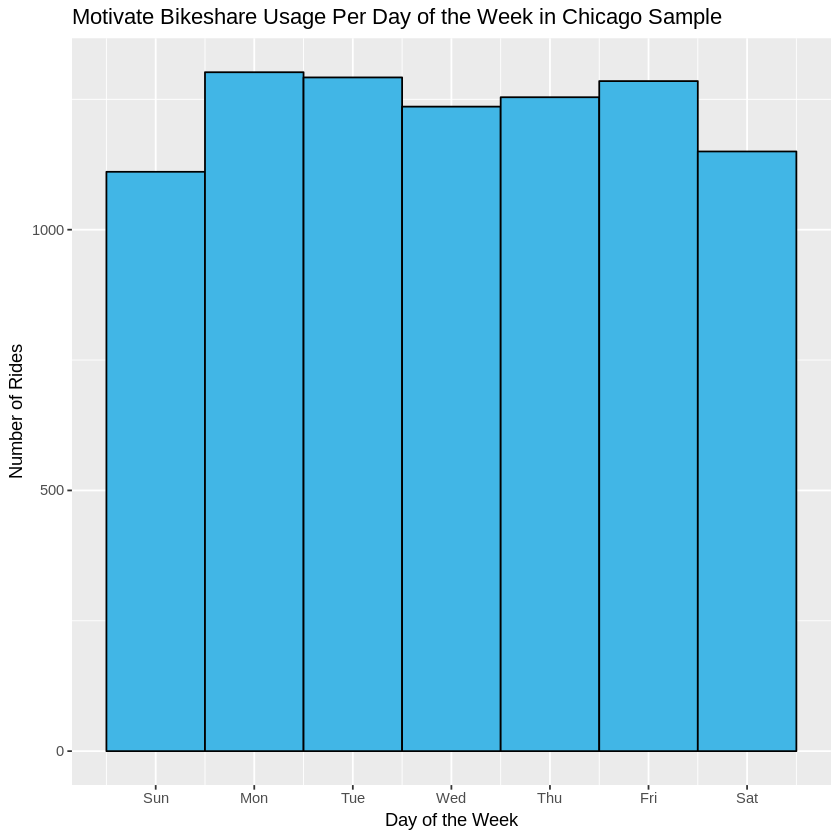

In [18]:
# Histogram of the usage per day of the week in Chicago
ggplot(aes(x = Num.Day.Of.Week), data = chi) + 
    geom_histogram(color = 'black', fill = '#41B6E6', binwidth = 1) + 
    scale_x_continuous(breaks = 1:7, labels = c('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat')) + 
    ggtitle('Motivate Bikeshare Usage Per Day of the Week in Chicago Sample') +
    xlab('Day of the Week') +
    ylab('Number of Rides')

In [19]:
# Count of Day.Of.Week in Chicago (Zach, 2021)
chi_day_of_week = table(chi$Day.Of.Week)
print(chi_day_of_week)


 Sun  Mon  Tue  Wed  Thu  Fri  Sat 
1111 1302 1292 1236 1254 1285 1150 


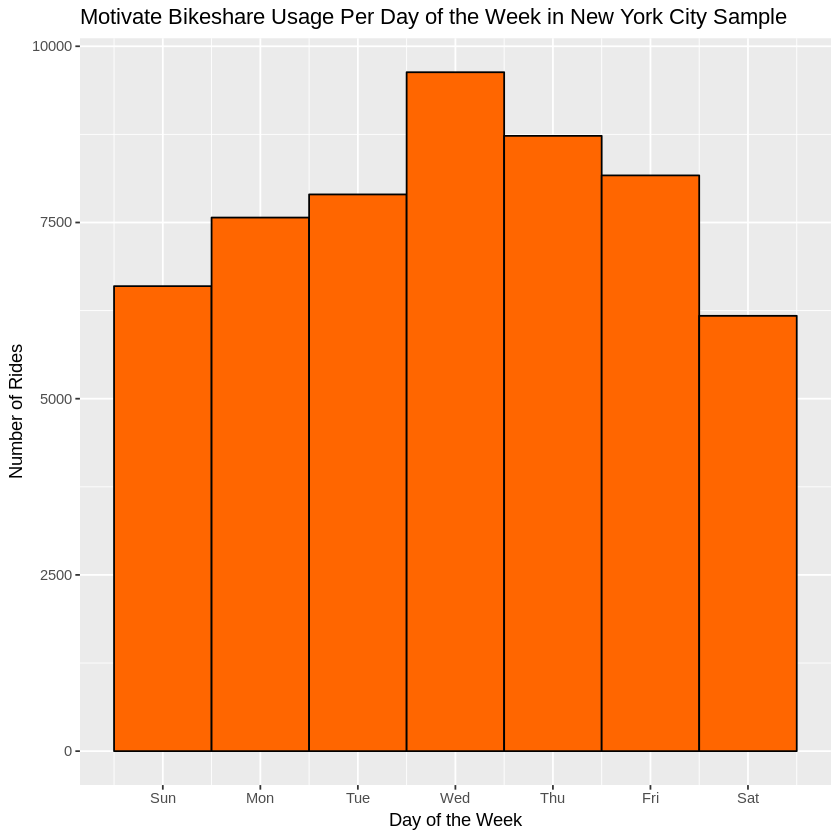

In [20]:
# Histogram of the usage per day of the week in New York City
ggplot(aes(x = Num.Day.Of.Week), data = ny) + 
    geom_histogram(color = 'black', fill = '#FF6600', binwidth = 1) + 
    scale_x_continuous(breaks = 1:7, labels = c('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat')) + 
    ggtitle('Motivate Bikeshare Usage Per Day of the Week in New York City Sample') +
    xlab('Day of the Week') +
    ylab('Number of Rides')

In [21]:
# Count of Day.Of.Week in New York City (Zach, 2021)
ny_day_of_week = table(ny$Day.Of.Week)
print(ny_day_of_week)


 Sun  Mon  Tue  Wed  Thu  Fri  Sat 
6597 7570 7898 9632 8729 8168 6176 


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

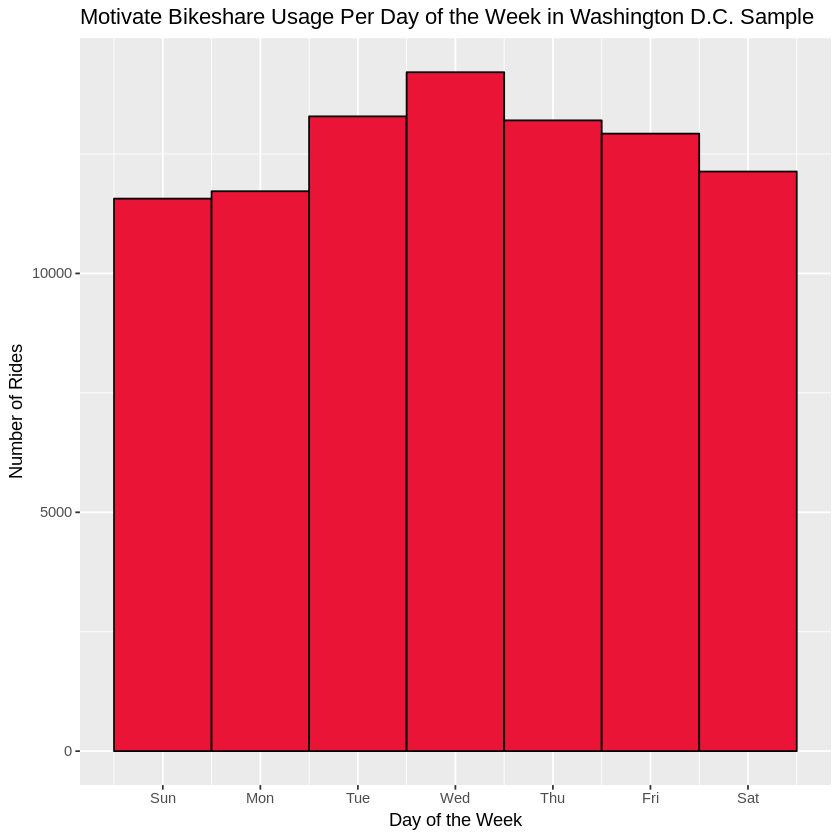

In [22]:
# Histogram of the usage per day of the week in Washington D.C.
ggplot(aes(x = Num.Day.Of.Week), data = wash) + 
    geom_histogram(color = 'black', fill = '#E91436', binwidth = 1) + 
    scale_x_continuous(breaks = 1:7, labels = c('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat')) + 
    ggtitle('Motivate Bikeshare Usage Per Day of the Week in Washington D.C. Sample') +
    xlab('Day of the Week') +
    ylab('Number of Rides')

In [23]:
# Count of Day.Of.Week in Washington D.C. (Zach, 2021)
wash_day_of_week = table(wash$Day.Of.Week)
print(wash_day_of_week)


  Sun   Mon   Tue   Wed   Thu   Fri   Sat 
11566 11721 13288 14212 13204 12926 12133 


#### Summary of Question 1 Results

The most popular day to bike in each city:
* Chicago
    * Monday (1302 rides)
* New York City
    * Wednesday (9632 rides)
* Washington D.C.
    * Wednesday (14212 rides)

This information was certainly unexpected. What happens in New York City and Washington D.C. on Wednesdays that causes more rides? However, the distribution of rides across an entire week makes sense, as more people are likely to use bikeshares during the week for commuting to and from work.

I could have combined all of this information in one bar plot, but I wanted to demonstrate my knowledge level by creating a variety of visuals throughout this project.

<a id='q2'></a>
### Question 2

What is the average trip duration for each city?

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

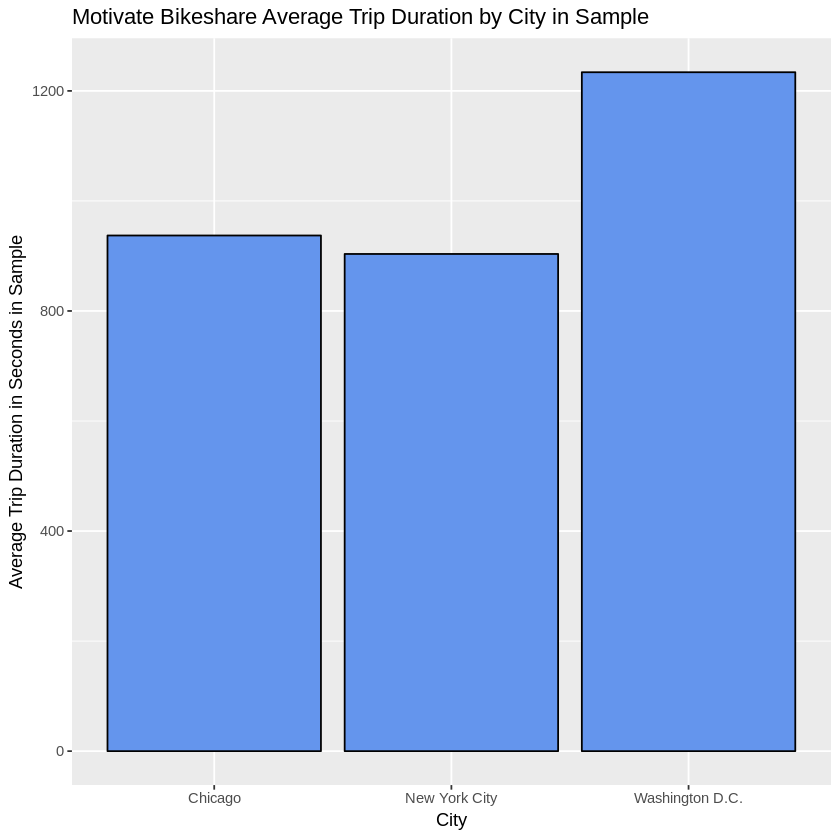

In [24]:
# Bar plot of the average trip duration for each city
ggplot(aes(x = City, y = Trip.Duration), data = master) +
    geom_bar(stat = "summary", 
             fun.y = "mean", 
             fill = '#6495ED', 
             color = 'black') + 
    ggtitle('Motivate Bikeshare Average Trip Duration by City in Sample') +
    xlab('City') + 
    ylab('Average Trip Duration in Seconds in Sample')

In [25]:
# Statistical summary of Trip.Duration for each city
by(master$Trip.Duration, master$City, summary)

master$City: Chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   394.2   670.0   937.2  1119.0 85408.0 
------------------------------------------------------------ 
master$City: New York City
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 
------------------------------------------------------------ 
master$City: Washington D.C.
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    60.3    410.9    707.0   1234.0   1233.2 904591.4        1 

#### Summary of Question 2 Results

Average trip duration for each city:
* Chicago
    * 937.2 seconds
* New York City
    * 903.6 seconds
* Washington D.C.
    * 1234.0 seconds

Washington D.C. is the city with the highest average trip duration, with an average length of 300 seconds more than either Chicago and New York City. This information is quite interesting since Washington D.C. is the smallest city out of the three. 

<a id='q3'></a>
### Question 3

How many customers and subscribers does each city have?

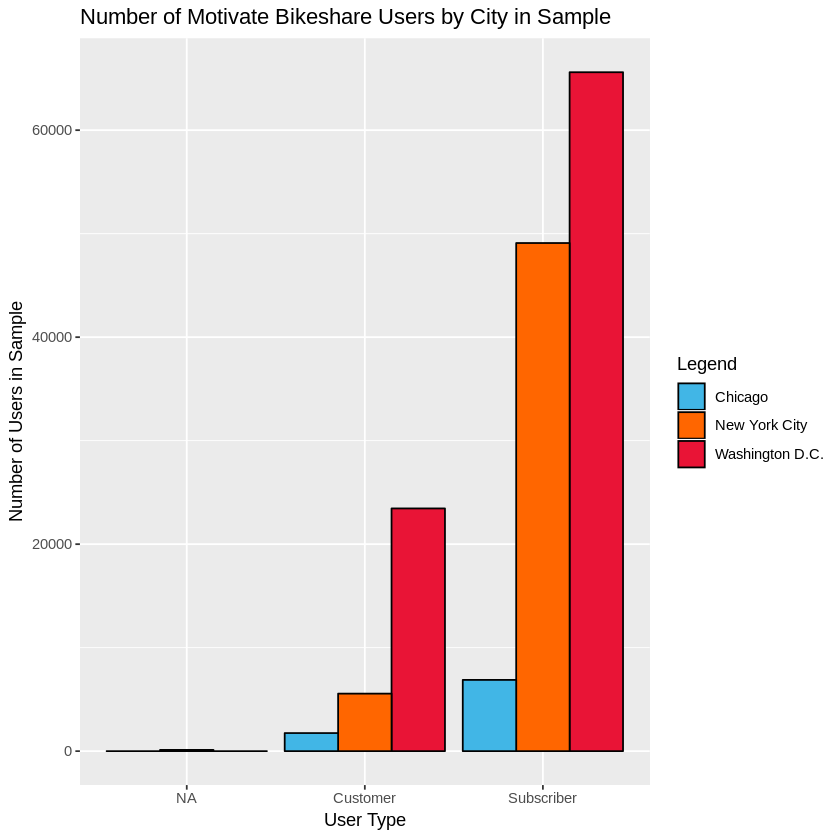

In [26]:
# Bar plot of the number of customers and subscribers for each city 
# (Isomurodov & Pedersen, n.d.) and (Pedersen, n.d.)
ggplot(aes(x = User.Type, fill = City), data = master) + 
    geom_bar(position = 'dodge', 
             color = 'black') +
    ggtitle('Number of Motivate Bikeshare Users by City in Sample') + 
    scale_x_discrete(labels = c('NA', 
                                'Customer', 
                                'Subscriber')) + 
    xlab('User Type') + 
    ylab('Number of Users in Sample') + 
    scale_fill_manual('Legend', values = c('Chicago' = '#41B6E6', 
                                           'New York City' = '#FF6600', 
                                           'Washington D.C.' = '#E91436'))

In [27]:
# Count of User.Type in Chicago (Zach, 2021)
user_types = table(master$User.Type[master$City == 'Chicago'])
print(user_types)


             Customer Subscriber 
         1       1746       6883 


In [28]:
# Count of User.Type in New York City (Zach, 2021)
user_types = table(master$User.Type[master$City == 'New York City'])
print(user_types)


             Customer Subscriber 
       119       5558      49093 


In [29]:
# Count of User.Type in Washington D.C. (Zach, 2021)
user_types = table(master$User.Type[master$City == 'Washington D.C.'])
print(user_types)


             Customer Subscriber 
         1      23450      65600 


#### Summary of Question 3 Results

Number of subscribers and customers for each city:
* Chicago
    * Customers: 6,883
    * Subscribers: 1,746
    * Total: 8,629
* New York City
    * Customers: 49,093
    * Subscribers: 5,558
    * Total: 54,651
* Washington D.C.
    * Customers: 65,600
    * Subscribers: 23,450
    * Total: 89,050

Once again, Washington D.C. shows the largest numbers out of all three cities with a total of 89,050 users. I would have expected New York City to have the most combined users; it is the city that Motivate is based in. 

I decided to omit the blank (NA) entries in this summary, even though they are displayed in the bar plot, for several reasons:
* My initial question did not include any entries other than 'subsriber' and 'customer'.
* The number of blank (NA) entries found was so small that they were most likely errors.
* The plot would not display the labels for each type of user without including more than two user types.

<a id='references'></a>
## References

> Isomurodov, J., & Pedersen, T. L. (n.d.) *Dodge overlapping objects side-to-side* Ggplot2. https://ggplot2.tidyverse.org/reference/position_dodge.html

> Motivate. (n.d.). *About us.* Motivate Co. https://www.motivateco.com/about

> NNK. (2022, August 23). *How to remove column in R?* Spark By Examples. https://sparkbyexamples.com/r-programming/remove-column-in-r/#:~:text=By%20using%20the%20R%20base,columns%20you%20wanted%20to%20remove

> Pedersen, T. L. (n.d.) *Create your own discrete scale.* Ggplot2. https://ggplot2.tidyverse.org/reference/scale_manual.html

> Wickham, H. (n.d.). *Parse date-times, with year, month, and day, hour, minute, and second components.* Lubridate. https://lubridate.tidyverse.org/reference/ymd_hms.html

> Zach. (2021, September 29). *How to find day of the week in R.* Statology. https://www.statology.org/r-day-of-week/

> Zach. (2021, June 7). *How to use the table function in R* Statology. https://www.statology.org/table-function-in-r/

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')